<center>
  <img src="https://i.imgur.com/ueAOD9v.png" width="750"/>
</center>

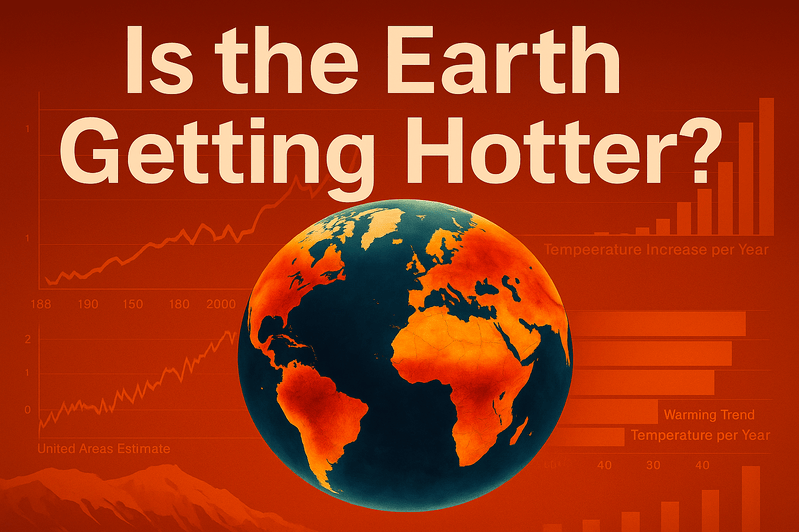

# 🌍 Is the Earth Getting Hotter? 

Climate change: myth, natural cycle, or undeniable truth? While some argue it's just nature’s rhythm, others point to a warming planet. But what does the data really tell us?

For centuries, temperatures have been recorded across cities, countries, and continents. But only by analyzing how they’ve evolved over time can we uncover the full picture.

Is our planet truly heating up? Is Austria mirroring the global trend? Have chilly winters softened and scorching summers intensified?

In this notebook, we’ll use Python and historical temperature records to uncover patterns, anomalies, and long-term indicators of climate change — revealing hidden trends, sudden spikes, and signs that may shape our future.

Let’s take a closer look at the past to better understand what might lie ahead for our planet.


# 🧰 Setup and Imports 

Before we dive into the analysis, let’s import the libraries and load the datasets.

In [ ]:
# Install pycountry_convert for continent/country mapping
!pip install pycountry-convert

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and warnings
import calendar
import warnings

# Other utilities
from scipy.stats import linregress
import pycountry_convert as pc
from IPython.display import display

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')


In [ ]:
#  Reading the datasets: global average temperatures and country-wise land temperatures
df_global = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')
df_country = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')

# 📋 A Quick Look at the Data
Before we begin analyzing trends and creating visualizations, it’s important to understand the structure of the datasets used in this project.
We’ll be working with two datasets: GlobalTemperatures.csv and GlobalLandTemperaturesByCountry.csv.
In this section, we’ll explore them separately to understand their structure, review key columns, and examine some basic descriptive statistics.
This will help us better understand our data sources and prepare for more in-depth analysis in the next steps.

  ###  GlobalTemperatures.csv – Preview of the Dataset       

In [ ]:
df_global.head()

###  GlobalTemperatures.csv – Dataset Overview

In [ ]:
df_global.info()

This dataset contains **3,192 records** and **9 columns**, where each row represents temperature-related measurements recorded on a specific date.  
It includes values related to **land and ocean temperatures**, as well as **uncertainty measures**.

We’ll explore the meaning of each column in detail in the next section.  
**It is worth noting that** some columns — such as those related to maximum and ocean temperatures — contain fewer non-null values, indicating missing data in earlier records.

### GlobalTemperatures.csv-Column Definitions


| Column Name                              | Description                                                                 |
|------------------------------------------|-----------------------------------------------------------------------------|
| `dt`                                     | Date of observation (monthly)                                              |
| `LandAverageTemperature`                 | Global average land surface temperature                                    |
| `LandAverageTemperatureUncertainty`      | Uncertainty associated with the average land temperature                   |
| `LandMaxTemperature`                     | Maximum recorded land surface temperature                                  |
| `LandMaxTemperatureUncertainty`          | Uncertainty associated with the maximum land temperature                   |
| `LandMinTemperature`                     | Minimum recorded land surface temperature                                  |
| `LandMinTemperatureUncertainty`          | Uncertainty associated with the minimum land temperature                   |
| `LandAndOceanAverageTemperature`         | Combined average temperature of land and ocean surfaces                    |
| `LandAndOceanAverageTemperatureUncertainty` | Uncertainty associated with the combined land and ocean temperature    |


###  GlobalTemperatures.csv- Descriptive Statistics

In [ ]:
df_global.describe()

The descriptive statistics of this dataset show that the **average land temperature** is approximately **8.37°C**, with values ranging from **-2.08°C** to **19.02°C**.

The **average maximum land temperature** (LandMaxTemperature) is around **14.35°C**, and the **average minimum land temperature** (LandMinTemperature) is about **4.15°C`.  
As for the **combined land and ocean average temperature** (LandAndOceanAverageTemperature), the recorded average is roughly **15.21°C**, with values ranging between **12.35°C** and **16.95°C**.

Additionally, the dataset includes **uncertainty columns** for each of these variables, which allow us to account for measurement reliability in our future analyses.

This summary provides a solid foundation for selecting the most relevant variables as we move into analyzing global temperature trends.

###  GlobalTemperatures.csv – Time Coverage

In [ ]:
df_global["dt"] = pd.to_datetime(df_global["dt"])
print("From:", df_global["dt"].min())
print("To:", df_global["dt"].max())

This dataset spans from **January 1750** to **December 2015**, providing monthly global average temperature data.  
The extensive time coverage of over **265 years** enables the exploration of historical climate trends and helps detect long-term global warming patterns.


  ###  GlobalLandTemperaturesByCountry – Preview of the Dataset       

In [ ]:
df_country.head()

###  GlobalLandTemperaturesByCountry – Dataset Overview

In [ ]:
df_country.info()

This dataset contains **577,462 records** and **4 columns**, where each row represents a temperature measurement for a specific country and date.  
It includes country-level data on **average land temperature** along with an **uncertainty measure** that reflects potential variations in the recorded values.

The dataset spans a wide time range and covers numerous countries across the globe, making it a valuable source for analyzing **regional climate patterns** and **long-term temperature trends**.

We’ll explore the meaning of each column in detail in the next section.

### GlobalLandTemperaturesByCountry-Column Definitions


| Column Name                     | Description                                                           |
|--------------------------------|-----------------------------------------------------------------------|
| `dt`                           | Date of observation (monthly)                                        |
| `AverageTemperature`           | Average land surface temperature for the given country               |
| `AverageTemperatureUncertainty`| Uncertainty associated with the average temperature                  |
| `Country`                      | Name of the country where the temperature measurement was recorded   |



###  GlobalLandTemperaturesByCountry- Descriptive Statistics

In [ ]:
df_country.describe()

The descriptive statistics of this dataset show that the **average land temperature at the country level** is approximately **17.19°C**, with values ranging from **-37.66°C to 38.84°C**.

The **average uncertainty** in the measurements is around **1.02°C**, spanning a range from **0.05°C to 15.00°C**. This wide range indicates varying levels of measurement accuracy, especially in older years or for countries with limited data.

This summary provides a solid foundation for analyzing temperature trends at the country level and assessing the **reliability of the data** in the subsequent stages of analysis.

###  GlobalLandTemperaturesByCountry – Time Coverage

In [ ]:
df_country["dt"] = pd.to_datetime(df_country["dt"])
print("From:", df_country["dt"].min())
print("To:", df_country["dt"].max())

This dataset spans from **November 1743** to **September 2013**, providing monthly land temperature data for various countries.

The wide temporal range of over **250 years** enables the analysis of long-term climate trends at the country level and serves as a valuable basis for regional temperature studies.

# 🧹 Data Cleaning and Preparation

###  Check for Missing Values          

In [ ]:
#  Drop unnecessary columns from the global and coutry datasets
df_global.drop(columns=["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty", "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperature", "LandAndOceanAverageTemperatureUncertainty"], inplace=True)
df_country.drop(columns=["AverageTemperatureUncertainty"], inplace=True)

#  Check for missing values in both datasets
print("Missing values in Global dataset:")
display(df_global.isnull().sum())

print("\nMissing values in Country-level dataset:")
display(df_country.isnull().sum())

- In the **df_global**, the `LandAverageTemperature` column has a small number of missing entries (12 rows), while `LandMaxTemperature` and `LandMinTemperature` each have 1,200 missing values.
- In the **df_country**, the `AverageTemperature` column contains a large number of missing values (over 32,000 rows).

Since `LandAverageTemperature` and `AverageTemperature` are the primary columns used in our analysis, it's essential to remove rows where these values are missing to ensure accurate results in the next steps.

In [ ]:
# Global-level: Keep only rows with valid LandAverageTemperature
# ⚠️ `LandMaxTemperature` and `LandMinTemperature` contain nulls, but since they’re only used in specific sections later,
# missing values will be handled at that point.
df_global = df_global.dropna(subset=["LandAverageTemperature"])

# Country-level: Keep only rows with valid AverageTemperature
df_country = df_country.dropna(subset=["AverageTemperature"])

###  Check for Duplicates


In [ ]:
#  Check and remove duplicates in Global dataset
print("Global dataset - Duplicate rows:", df_global.duplicated().sum())
df_global.drop_duplicates(inplace=True)

#  Check and remove duplicates in Country-level dataset
print("Country-level dataset - Duplicate rows:", df_country.duplicated().sum())
df_country.drop_duplicates(inplace=True)

✅ **No duplicate rows were found.**

###  Convert Columns to DateTime       

In [ ]:
# Convert 'dt' column to datetime format
df_global['dt'] = pd.to_datetime(df_global['dt'])
df_country['dt'] = pd.to_datetime(df_country['dt'])

###  Extract Year           

In [ ]:
#  Extract Year  from 'dt' column
df_global['Year'] = df_global['dt'].dt.year
df_country['Year'] = df_country['dt'].dt.year

display(df_global)
display(df_country)

###  Inspect Categorical Columns 

In [ ]:
# Inspect the 'Country' column in the country-level dataset
print("Unique countries and their record counts:")
display(df_country['Country'].value_counts())

From the output, we observe that the dataset contains 242 unique countries, each with a varying number of records. No missing or inconsistent country names were found, indicating the column is clean and ready for further analysis.

###  Detect and Explore Outliers       

In [ ]:
# Boxplot for LandAverageTemperature
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_global["LandAverageTemperature"])
plt.title("Boxplot - LandAverageTemperature")
plt.xlabel("Temperature (°C)")
plt.show()

This boxplot provides a quick overview of the distribution of global land average temperatures.  
The distribution appears to be **reasonably symmetrical** with **no extreme outliers**, indicating that the data is clean and suitable for further analysis.

# 🔍📈 Data Exploration and Visualization

## 📊 Getting Warmer? A Look at Temperature Trends Over Time

Understanding how temperatures have evolved over time is key to identifying climate trends.
In this section, we examine yearly, monthly, and long-term patterns—both globally and in Austria—
to uncover signs of warming, seasonal shifts, and the pace of change.


### 🗓️ Yearly Global Trends

In [ ]:
# Calculate the global average land temperature for each year
global_yearly_avg = df_global.groupby('Year')['LandAverageTemperature'].mean().reset_index()
global_yearly_avg

In [ ]:
# Create a copy to keep 'global_yearly_avg' unchanged for future analysis
yearly_rolling_df = global_yearly_avg.copy()

# Calculate 10-year moving average to show overall temperature trend
yearly_rolling_df['RollingMean'] = yearly_rolling_df['LandAverageTemperature'].rolling(window=10).mean()

yearly_rolling_df

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(yearly_rolling_df['Year'], yearly_rolling_df['LandAverageTemperature'], label='Yearly Avg Temp', color='orange')
plt.plot(yearly_rolling_df['Year'], yearly_rolling_df['RollingMean'], label='10-Year Rolling Avg', color='red', linewidth=2)
plt.fill_between(yearly_rolling_df['Year'], yearly_rolling_df['LandAverageTemperature'], alpha=0.2, color='orange')
plt.title('Yearly Global Land Temperature Trends')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

This line chart visualizes the global land average temperature over the years.

- **Orange Line**: Yearly average land temperature.  
- **Red Line**: 10-year rolling mean — helps smooth short-term fluctuations and highlight long-term trends.

- There is a **clear upward trend** in land temperatures over time, particularly after the 1950s.
- When the **orange line rises above** the red line, it means the year was **hotter than the 10-year average**.
- When the **orange line falls below** the red line, it means the year was **cooler than average**.
- The **gap** between the lines indicates the strength of the deviation from the long-term trend.

 ✅ This visualization provides compelling evidence of global warming and helps us understand long-term climate behavior.


### 🏔️ Austria’s Long-Term Trend

In [ ]:
# Create a copy to keep 'df_country' unchanged for future analysis
df_austria = df_country[df_country['Country'] == 'Austria'].copy()

# Calculate the average temperature for each year
austria_yearly_avg = df_austria.groupby('Year')['AverageTemperature'].mean().reset_index() 
austria_yearly_avg

In [ ]:
# Calculate 10-year moving average to show overall temperature trend
austria_yearly_avg['RollingMean'] = austria_yearly_avg['AverageTemperature'].rolling(window=10).mean()
austria_yearly_avg

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(austria_yearly_avg['Year'], austria_yearly_avg['AverageTemperature'], label='Austria Avg Temp', color='lightgreen')
plt.plot(austria_yearly_avg['Year'], austria_yearly_avg['RollingMean'], label='Austria 10-Year Avg', color='grey', linewidth=2)
plt.fill_between(austria_yearly_avg['Year'], austria_yearly_avg['AverageTemperature'], alpha=0.2, color='lightgreen')

plt.title("Austria’s Land Temperature Trends")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

- **Light Green Line**: Yearly average land temperature in Austria.  
- **Gray Line**: 10-year rolling average — helps smooth short-term fluctuations and highlight Austria’s long-term climate trends.  
- There is a **clear upward trend** in Austria’s temperatures, especially after the 1980s.  
- When the **light green line rises above** the gray line, it means the year was **hotter than the 10-year average**.  
- When the **light green line falls below** the gray line, it was a **cooler than average** year.  
- The **gap between the two lines** indicates the strength of deviation from long-term behavior.  

✅ *This chart highlights a warming trend in Austria and supports the global evidence of climate change.*

In [ ]:
# Merging Austrian and global data based on year
comparison_df = pd.merge(
    austria_yearly_avg,
    yearly_rolling_df[['Year', 'LandAverageTemperature', 'RollingMean']],
    on='Year',
    how='inner'
)
# Renaming columns for clarity
comparison_df.columns = ['Year', 'AustriaAvg', 'AustriaRolling', 'GlobalAvg', 'GlobalRolling']
comparison_df

In [ ]:
plt.figure(figsize=(14,7))

# Austria
plt.plot(comparison_df['Year'], comparison_df['AustriaAvg'], label=' Austria Avg Temp', color='lightgreen', alpha=0.7)
plt.plot(comparison_df['Year'], comparison_df['AustriaRolling'], label=' Austria 10-Year Avg', color='gray', linewidth=2)

# Global
plt.plot(comparison_df['Year'], comparison_df['GlobalAvg'], label=' Global Avg Temp', color='orange', alpha=0.7)
plt.plot(comparison_df['Year'], comparison_df['GlobalRolling'], label=' Global 10-Year Avg', color='red', linewidth=2)

plt.title("Austria vs Global Land Temperature Trends")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


- Both Austria and the global data show a **clear upward trend** in land temperatures, especially after the **1950s**.  
- **Global temperatures** have consistently remained **higher** than Austria’s throughout the historical record.  
- The **10-year rolling average for Austria** shows more fluctuation in early years but becomes smoother and steadily increasing in recent decades.  
- From the **1990s onward**, both trends indicate a **sharp rise**, highlighting the accelerating effects of climate change.  
- The **gap between Austria and global temperatures** has **narrowed** in recent years, suggesting that **Austria may now be warming faster**.

✅ This visualization clearly shows that **Austria is not exempt from global warming** and is closely following the global climate trajectory.

### 📆 Monthly Temperature Pattern

In [ ]:
# Extract month from date
df_global['Month'] = df_global['dt'].dt.month

# Calculate the average land temperature for each calendar month (across all years)
global_monthly_avg = df_global.groupby('Month')['LandAverageTemperature'].mean().reset_index()

# Convert month numbers to abbreviated month names (Jan, Feb, etc.)
global_monthly_avg['MonthName'] = global_monthly_avg['Month'].apply(lambda x: calendar.month_abbr[x])

global_monthly_avg

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(global_monthly_avg['MonthName'], global_monthly_avg['LandAverageTemperature'],
         marker='o', color='orange')

plt.title('Average Global Land Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()



"Understanding monthly temperature variations helps isolate seasonal effects from long-term trends, making it easier to spot anomalies or persistent changes due to climate change."

This line chart shows the **average global land temperature** for each calendar month, aggregated over **all available years**.

- **🟠 Orange Line**: Average global land temperature by month


- **July** is the warmest month, with an average temperature exceeding **14°C**.
- **January** is the coldest, averaging just above **2°C**.
- The temperature rises steadily from **January to July**, then declines toward **December**, forming a clear **seasonal cycle**.
- There is a temperature difference of more than **12°C** between the hottest and coldest months.


 This visualization highlights the **cyclical nature of Earth’s climate**, driven by seasonal changes in solar radiation. It provides a valuable baseline for comparing against **long-term climate trends**.

### 📊 Frequency of Above-Average Temperatures

In [ ]:
# Calculate the overall average global land temperature (ignoring NaNs)
global_mean_temp = df_global['LandAverageTemperature'].mean()
global_mean_temp

In [ ]:
# We're reusing the 'global_yearly_avg' DataFrame that we previously created,
# which holds the average land temperature for each year.

# Create a copy to preserve the original 'global_yearly_avg'
above_avg_df = global_yearly_avg.copy()

# Add column: True if above global mean
above_avg_df['AboveAverage'] = above_avg_df['LandAverageTemperature'] > global_mean_temp

# Add a 'Decade' column
above_avg_df['Decade'] = (above_avg_df['Year'] // 10) * 10

above_avg_df

In [ ]:
# Count how many years in each decade had above-average temperatures
above_avg_per_decade = above_avg_df.groupby('Decade')['AboveAverage'].sum().reset_index()

above_avg_per_decade

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(above_avg_per_decade['Decade'], above_avg_per_decade['AboveAverage'], width=8, color='tomato')
plt.title(' Frequency of Years with Above Global Average Temperatures by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Above Average Years')
plt.grid(axis='y')
plt.show()

The bar chart above shows the **number of years per decade** in which the global land temperature was above the **long-term global mean**.

A clear **upward trend** can be observed starting from the early 20th century. While fluctuations are visible in earlier decades, the pattern becomes remarkably consistent from the **1940s onward**, where **nearly every year** in each decade registers as warmer than average. This signals a shift from **natural variability** to a more **persistent warming pattern**.

Interestingly, **earlier decades** such as the 1800s and mid-1800s had **significantly fewer** above-average years, reinforcing the idea that **recent warming is unusual** in the context of the past two and a half centuries.

But this brings up a critical question:  
 **How much warmer were those "above-average" decades compared to the global mean itself?**  
Let’s investigate that next.


In [ ]:
# Compute average temperature per decade
decade_avg_temp = above_avg_df.groupby('Decade')['LandAverageTemperature'].mean().reset_index()
decade_avg_temp

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(decade_avg_temp['Decade'], decade_avg_temp['LandAverageTemperature'], marker='o', color='orange', label='Decade Avg Temp')
plt.axhline(global_mean_temp, color='gray', linestyle='--', label=f'Global Mean Temp ({global_mean_temp:.2f}°C)')
plt.title(" Decade Average Temperatures vs. Global Mean")
plt.xlabel("Decade")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

As shown, **pre-1900 decades** typically remained **below or close to the global mean** of **8.37°C**. But starting in the **1910s**, a **clear and steady upward trend** emerges, with each successive decade getting warmer than the last.

The **most recent decades (1990s–2010s)** show the largest increase, rising well over **1°C above the long-term global average**.  
This indicates that we're not just seeing random fluctuations anymore, but a **persistent and accelerating warming pattern**.

Together with the previous bar chart, this line plot reveals not only the **frequency** of above-average years but also the **magnitude** of the warming.  
When viewed side-by-side, the two charts paint a powerful and concerning picture of long-term **climate change**.

### 📉 Rate of Temperature Change Over Time

In [ ]:
# We're reusing the 'global_yearly_avg' DataFrame that we previously created, 
# which holds the average land temperature for each year.

# Create a copy to preserve the original 'yearly_avg'
temp_change_df = global_yearly_avg.copy()

# Calculate year-over-year temperature change
temp_change_df['ChangeRate'] = temp_change_df['LandAverageTemperature'].diff()

temp_change_df

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(temp_change_df['Year'], temp_change_df['ChangeRate'], color='purple', linewidth=1)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title(' Yearly Rate of Change in Global Land Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.grid(True)
plt.show()


The line chart illustrates the **yearly change** in global land temperatures from **1750 to 2015** :

*   **Large fluctuations in early years (before 1800):**  
   The temperature change varies wildly, with some years showing changes over ±2°C.  
   *Possible reason:* Limited and less accurate historical data during the 18th century.

*  **More stable variation between 1800 and 1900:**  
   Year-to-year temperature changes are smaller and less erratic.  
   *Interpretation:* Improvements in data recording and relatively stable climate during this period.

*  **More frequent positive changes after 1950:**  
   There is a noticeable increase in years with positive temperature changes.  
   *Insight:* This likely marks the onset of accelerated global warming due to industrial emissions and greenhouse gases.

*   **Majority of changes remain within ±0.5°C range:**  
   Most fluctuations are small, but the **overall trend** over time is crucial.

While individual years show natural variability, the **pattern of increasingly frequent positive changes**—especially in recent decades—supports the evidence of **long-term global warming**.


### 📝 Summary: Getting Warmer?

Our deep dive into global and regional temperature data reveals an undeniable pattern: Earth is getting warmer.

🌍 Global land temperatures have shown a clear and steady rise—especially since the 1950s—highlighting long-term climate warming.

🇦🇹 Austria's temperatures reflect this global trend, with an even sharper increase since the 1980s, signaling possible regional acceleration.

📊 There has been a consistent rise in the number of above-average years per decade since the 1940s, marking a shift from natural variability to a persistent warming trend.

🗓️ The monthly pattern confirms Earth’s natural seasonal cycle, yet the overall warming signal goes far beyond normal fluctuations.

📈 The rate of yearly temperature change has become more stable but increasingly positive, especially in recent decades, supporting the impact of human-induced climate change.

✅ Together, the visualizations present strong, consistent evidence of global warming—both in magnitude and frequency—and emphasize the urgent need for climate awareness and action.


##  🌡️ How Extreme Can It Get? A Look at Temperature Extremes 


Extreme temperature events offer valuable insights into the variability and intensity of climate change.  
In this section, we identify the hottest and coldest years on record, detect unusual temperature outliers,  
and explore how often global temperatures rise above historical averages.

### 🔥 Hottest and Coldest Years

In [ ]:
# Create new dataframe for max and min temperatures, dropping missing values
df_extremes = df_global[['Year', 'LandMaxTemperature', 'LandMinTemperature']].dropna()

# Group by year and get yearly max/min
yearly_extremes = df_extremes.groupby('Year').agg({
    'LandMaxTemperature': 'max',
    'LandMinTemperature': 'min'
}).reset_index()

# Rename columns for clarity
yearly_extremes.rename(columns={
    'LandMaxTemperature': 'Yearly_Max_Temp',
    'LandMinTemperature': 'Yearly_Min_Temp'
}, inplace=True)

yearly_extremes

In [ ]:
# Find the hottest recorded temperature and its year
hottest_extreme = yearly_extremes.loc[yearly_extremes['Yearly_Max_Temp'].idxmax()]
# Find the coldest recorded temperature and its year
coldest_extreme = yearly_extremes.loc[yearly_extremes['Yearly_Min_Temp'].idxmin()]

# Print the results
print(f"🔥 Highest Recorded Temperature: {hottest_extreme['Yearly_Max_Temp']:.2f} °C in {int(hottest_extreme['Year'])}")
print(f"❄️ Lowest Recorded Temperature: {coldest_extreme['Yearly_Min_Temp']:.2f} °C in {int(coldest_extreme['Year'])}")


In [ ]:
plt.figure(figsize=(14, 6))

# Plot yearly max temperatures
plt.plot(yearly_extremes['Year'], yearly_extremes['Yearly_Max_Temp'], label='Yearly Max Temperature', color='red')

# Plot yearly min temperatures
plt.plot(yearly_extremes['Year'], yearly_extremes['Yearly_Min_Temp'], label='Yearly Min Temperature', color='blue')

# Highlight the hottest year (bright orange)
plt.scatter(hottest_extreme['Year'], hottest_extreme['Yearly_Max_Temp'], 
            color='darkorange', label='Hottest Year', s=130, zorder=5)

# Highlight the coldest year (bright sky blue)
plt.scatter(coldest_extreme['Year'], coldest_extreme['Yearly_Min_Temp'], 
            color='deepskyblue', label='Coldest Year', s=130, zorder=5)

# Title and labels
plt.title(' Hottest and  Coldest Recorded Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




The analysis of extreme annual temperatures reveals striking contrasts between the warmest and coldest years on record. The highest recorded land temperature occurred in **2011**, reaching **21.32 °C**, while the coldest year was **1857**, with a minimum recorded temperature of **–5.41 °C**.

These extremes are clearly visible in the plot, where 2011 stands out with an unusually high maximum, and 1857 shows a remarkably low minimum. Notably, most of the warmest years appear in recent decades, reflecting a general warming trend. In contrast, the coldest years are concentrated in the mid- to late-19th century.

This shift in temperature extremes supports the broader evidence of a warming planet, where new heat records are increasingly common, and cold records have become rare.


### 🧊 Outlier Detection

In [ ]:
# We are reusing the `yearly_extremes` DataFrame created earlier, 
# which contains the maximum and minimum recorded land temperatures for each year.

# Calculate IQR (Interquartile Range) for both max and min yearly temperatures
# to define upper and lower bounds for outlier detection.

# For max temperatures
q1_max = yearly_extremes['Yearly_Max_Temp'].quantile(0.25)
q3_max = yearly_extremes['Yearly_Max_Temp'].quantile(0.75)
iqr_max = q3_max - q1_max
upper_bound_max = q3_max + 1.5 * iqr_max
lower_bound_max = q1_max - 1.5 * iqr_max

# For min temperatures
q1_min = yearly_extremes['Yearly_Min_Temp'].quantile(0.25)
q3_min = yearly_extremes['Yearly_Min_Temp'].quantile(0.75)
iqr_min = q3_min - q1_min
upper_bound_min = q3_min + 1.5 * iqr_min
lower_bound_min = q1_min - 1.5 * iqr_min

# Print the calculated bounds for review
print(f"Upper bound for max temps: {upper_bound_max:.2f}")
print(f"Lower bound for max temps: {lower_bound_max:.2f}")

print(f"Upper bound for min temps: {upper_bound_min:.2f}")
print(f"Lower bound for min temps: {lower_bound_min:.2f}")


In [ ]:
# Identify years with unusually high or low temperatures (outliers)
# based on the calculated IQR thresholds.

# Outliers in max temps
outliers_max = yearly_extremes[
    (yearly_extremes['Yearly_Max_Temp'] > upper_bound_max) |
    (yearly_extremes['Yearly_Max_Temp'] < lower_bound_max)
]

# Outliers in min temps
outliers_min = yearly_extremes[
    (yearly_extremes['Yearly_Min_Temp'] > upper_bound_min) |
    (yearly_extremes['Yearly_Min_Temp'] < lower_bound_min)
]

print("Outliers in Yearly Max Temperature:")
display(outliers_max)

print("\nOutliers in Yearly Min Temperature:")
display(outliers_min)


In [ ]:
plt.figure(figsize=(12, 6))

# Outlier points for max and min temps
plt.scatter(outliers_max['Year'], outliers_max['Yearly_Max_Temp'], 
            color='orange', edgecolor='black', s=100, label='Max Temp Outliers', alpha=0.8)

plt.scatter(outliers_min['Year'], outliers_min['Yearly_Min_Temp'], 
            color='cyan', edgecolor='black', s=100, label='Min Temp Outliers', alpha=0.8)

# Horizontal lines for IQR bounds
plt.axhline(upper_bound_max, color='red', linestyle='--', linewidth=1.5, label='Upper Bound Max Temp')
plt.axhline(lower_bound_max, color='red', linestyle=':', linewidth=1.5, label='Lower Bound Max Temp')

plt.axhline(upper_bound_min, color='blue', linestyle='--', linewidth=1.5, label='Upper Bound Min Temp')
plt.axhline(lower_bound_min, color='blue', linestyle=':', linewidth=1.5, label='Lower Bound Min Temp')

# Labels and layout
plt.title(" Outlier Years Based on Temperature Extremes with Boundaries")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



The visualization highlights years with extreme temperature values. Most **cold outliers** in maximum temperature occurred during the **1850s–1860s**, where the yearly maximum temperatures were unusually low. In contrast, **recent warm outliers** appeared in **2002** and **2011**, with 2011 reaching the highest recorded value of **21.32 °C**.

Regarding minimum temperatures, only two cold outliers were identified: **1857** and **1893**. Among them, **1857** stands out for also being a maximum temperature outlier — not because it was high, but because its maximum value fell **below** the expected lower bound. That year recorded a particularly low minimum of **−5.41 °C**, making it the most extreme cold anomaly in the dataset.

Overall, the concentration of recent high-temperature outliers and the rarity of cold extremes in recent years suggest a long-term warming trend.


### 🌡️ Temperature Above Global Mean  

In [ ]:
country_yearly_avg = df_country.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()
country_yearly_avg 

In [ ]:
country_avg_temp = country_yearly_avg.groupby('Country')['AverageTemperature'].mean().reset_index()
country_avg_temp

In [ ]:
# We're reusing the 'global_mean_temp' that we previously calculated
# which holds the overall average global land temperature.

# Calculate the difference from the global mean
country_avg_temp['DiffFromGlobal'] = country_avg_temp['AverageTemperature'] - global_mean_temp


# Keep only countries with average temperature above global mean
above_global = country_avg_temp[country_avg_temp['DiffFromGlobal'] > 0]

above_global

In [ ]:
# Show top 5 countries with the highest difference from global mean
top5_hottest_countries = above_global.sort_values(by='DiffFromGlobal', ascending=False).head(5)
top5_hottest_countries

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot(above_global['DiffFromGlobal'], vert=False)

colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, row in enumerate(top5_hottest_countries.itertuples()):
    plt.scatter(row.DiffFromGlobal, 1, color=colors[i], label=row.Country, s=100)
   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', title='Top 5 Countries')

plt.title('Boxplot of Country Average Temperatures Above Global Mean (with Top 5 Highlighted)')
plt.xlabel('Difference from Global Mean Temperature (°C)')
plt.grid(True)
plt.show()


The boxplot above visualizes the distribution of countries whose average land temperatures are higher than the overall global average.

The **Top 5 hottest countries** — **Djibouti, Mali, Burkina Faso, Senegal, and Aruba** — stand out as **outliers** with the highest temperature differences.

Their extreme values highlight regions with **persistent heat** and suggest a **concentration of warming** in specific parts of the world.

📝 **summary: How Extreme Can It Get?**

The analysis of temperature extremes paints a clear picture of our planet’s warming trajectory.  
Over the past century and a half, **2011** emerged as the warmest year on record, while **1857** stood out as the coldest —  
a stark contrast that underscores the widening temperature range due to climate change.

Outlier detection revealed that most **cold anomalies** were concentrated in the **mid-19th century**,  
while recent decades saw a rise in **extreme heat outliers**, especially in **2002 and 2011**.  
This trend suggests a **diminishing occurrence of cold extremes** and **increasing frequency of warm anomalies**.

A look at average temperatures showed that countries like **Djibouti**, **Mali**, and **Burkina Faso**  
consistently experience the hottest climates globally, significantly above the global mean —  
highlighting **localized, persistent heat zones**.

🔍 **Overall**, the data points to an undeniable global shift:  
**Extreme heat is becoming more common**, **cold extremes are fading**, and **temperature patterns are changing across regions** — all of which highlight the **urgency for climate action**



## 🌍 How Does Warming Vary Across the Globe? A Regional & Continental Breakdown

Global warming is not happening evenly across the planet. In this section, we explore **how warming trends vary across continents and regions**, and identify the areas experiencing the most significant increases in temperature.  
We will analyze **continental averages**, **region-based above-average years**, and **how regional temperatures compare to the global mean**.  

### 🧭 Continental Warming Trends

In [ ]:
# Function to convert country name to continent name
def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

# We're reusing the `country_yearly_avg` DataFrame created earlier,
# which contains the yearly average temperatures for each country .


# Create a new DataFrame with a continent column
df_with_continent = country_yearly_avg.copy()
df_with_continent['Continent'] = df_with_continent['Country'].apply(country_to_continent)

# Remove rows with undefined continents
df_with_continent = df_with_continent.dropna(subset=['Continent'])

df_with_continent

In [ ]:
# Group by 'Continent' and 'Year' to calculate the average temperature for each continent each year
df_continent_yearly = df_with_continent.groupby(['Continent', 'Year'])['AverageTemperature'].mean().reset_index()
df_continent_yearly

In [ ]:
# Filter data from 1900 onwards to reduce noise from sparse and less reliable early data
df_recent = df_continent_yearly[df_continent_yearly['Year'] >= 1900]
df_recent

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_recent, x='Year', y='AverageTemperature', hue='Continent')

plt.title('Continental Average Temperatures (1900–2013)')
plt.ylabel('Average Temperature (°C)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

The chart shows the **average annual temperatures by continent** from **1900 to 2013**. A clear **warming trend** is observed across **all continents**, highlighting the **global nature of climate change**. **Africa** and **Oceania** consistently record the **highest average temperatures**, while **Europe**, despite having the **lowest overall temperatures**, shows a **notable upward trend** over time. **Asia** and **Europe** in particular demonstrate a **sharper increase in recent decades**, indicating that the **impacts of climate change are intensifying** in these regions. This visualization underscores that **no region is immune** to rising temperatures, though **the pace and pattern of warming differ** by continent.

### 📌 Region-Based Above-Average Years

In [ ]:
# Calculate the long-term average temperature for each continent
continent_avg_temp = df_recent.groupby('Continent')['AverageTemperature'].mean()

continent_avg_temp

In [ ]:
# We're reusing the 'df_recent' DataFrame that we previously created,
# which contains the average land temperature per year for each continent after 1900.

# Create a copy to preserve the original 'df_recent'
df_recent_above_avg = df_recent.copy()

# Add column: True if above global mean
df_recent_above_avg['AboveAverage'] = df_recent_above_avg['AverageTemperature'] > df_recent_above_avg['Continent'].map(continent_avg_temp)

# Add a 'Decade' column
df_recent_above_avg['Decade'] = (df_recent_above_avg['Year'] // 10) * 10

df_recent_above_avg

In [ ]:
# Count above-average years per continent per decade
above_avg_counts = df_recent_above_avg[df_recent_above_avg['AboveAverage']].groupby(['Continent', 'Decade']).size().reset_index(name='AboveAvgYears')

above_avg_counts.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=above_avg_counts, x='Decade', y='AboveAvgYears', hue='Continent')

plt.title('Number of Above-continent-Average Years per Decade by Continent')
plt.xlabel('Decade')
plt.ylabel('Count of Above-Continent-Average Years')
plt.legend(title='Continent')
plt.tight_layout()
plt.show()

The bar chart displays the number of years in each decade when the average temperature in a continent exceeded its **own long-term average (1900–2013)**.

It reveals a **clear upward trend**, with a **sharp rise** in the number of above-average years starting from the **1980s**. 

From the **1990s onward**, almost all continents consistently experience **close to 10 above-average years per decade**, indicating that **nearly every year in recent decades has been warmer** than each continent’s own long-term average.

This is particularly evident in **Africa**, **Asia**, **Oceania**, and **South America**, where the bars reach the **maximum count** in the last three decades. 

The **universal rise across continents** emphasizes the **widespread and accelerating impact of climate change**. This chart clearly shows that **no continent is spared** and that the **frequency of warm years is intensifying globally**.

### 🌡️ Global Mean vs. Regional Means

In [ ]:
# We're reusing the 'continent_avg_temp' Series that we previously created,
# which contains the overall average temperature for each continent.


# Convert the Series 'continent_avg_temp' into a DataFrame
# so that 'Continent' becomes a regular column (not an index),
# and rename the columns for easier plotting and readability
continent_avg_temp_df = continent_avg_temp.reset_index()
continent_avg_temp_df.columns = ['Continent', 'AverageTemperature']
display(continent_avg_temp_df)

# We're reusing the 'global_mean_temp' variable that we previously calculated,
# which holds the overall average global land temperature.

print(f"global_mean_temp={global_mean_temp}")

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(data=continent_avg_temp_df, x='Continent', y='AverageTemperature')

plt.axhline(global_mean_temp, color='red', linestyle='--', linewidth=2, 
            label=f'Global Avg ({global_mean_temp:.2f}°C)')

plt.title(" Average Temperature by Continent with Global Average Line")
plt.ylabel("Temperature (°C)")
plt.xlabel("Continent")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

While the global average temperature is approximately **8.37°C**, most continents—particularly **Africa**, **Oceania**, and **North America**—record significantly **higher average temperatures**.

Only **Europe** has an average temperature slightly **below** the global mean, which pulls the global value downward due to its relatively low figures. In contrast, **Africa** and **Oceania** exceed the global mean by more than **15°C**, highlighting stark regional variations.

This visualization clearly shows that **regional climates vary greatly**, and some continents are inherently much **warmer** than others. Such contrasts are crucial when analyzing **global warming patterns**, as warming affects each region differently based on their baseline temperatures.

### 📝 Summary: How Does Warming Vary Across the Globe?

The analysis reveals that **global warming impacts are not evenly distributed across the world**. While the **global average land temperature** is around **8.37°C**, most continents—especially **Africa**, **Oceania**, and **North America**—have significantly **higher average temperatures**, often exceeding the global mean by over **15°C**.

In contrast, **Europe** stands out as the only continent with an average **below the global mean**, pulling the global value downward.

When examining **above-average years per decade**, there is a clear **upward trend** starting from the **1980s**, with almost all continents experiencing more **frequent warm years**. From the **1990s onward**, many regions show **close to 10 above-average years per decade**, signaling that nearly **every year** has been **warmer than each continent’s long-term average**.

Overall, the data highlights that **no continent is immune to rising temperatures**. The **pace and intensity of warming vary across regions**, with some areas warming **faster and more consistently** than others. These insights are crucial for understanding the **regional dynamics of climate change** and for guiding **targeted mitigation efforts**.

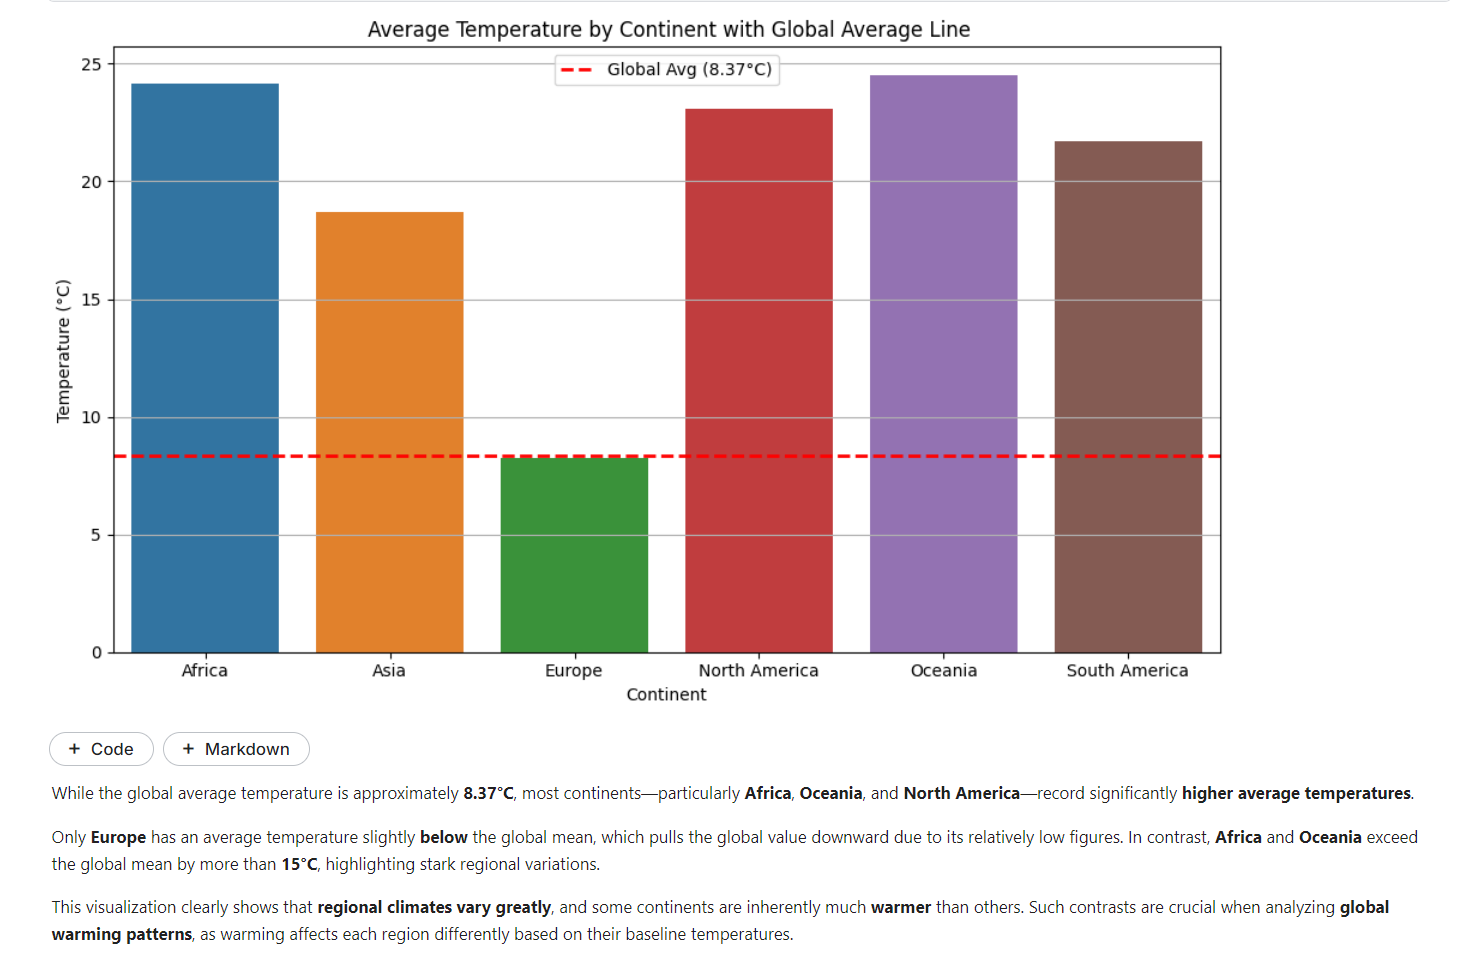

## 📊  How Do Countries Differ in Warming Trends? A Country-Level Comparison of Temperature Patterns

Is every country warming at the same rate?  
In this section, we shift the focus from continents to **individual countries** to examine how climate change manifests at the national level.  
We explore **the hottest and coldest countries**, compare **Austria with the global landscape**, and identify nations that are **consistently above the global average** or are warming **most rapidly**.

These comparisons help reveal how **local conditions**, **geographic location**, and **regional climates** influence the pace and intensity of warming.

### 🌎 Top Hottest & Coldest Countries 

In [ ]:
# We're reusing the `country_avg_temp` DataFrame created earlier,
# which contains the average temperature for each country.

# Get the top 10 hottest and coldest countries based on their average temperature
hottest_countries = country_avg_temp .sort_values(by='AverageTemperature', ascending=False).head(10)
coldest_countries = country_avg_temp .sort_values(by='AverageTemperature', ascending=True).head(10)

# Drop 'DiffFromGlobal' column to keep only Country and AverageTemperature
hottest_countries = hottest_countries.drop(columns='DiffFromGlobal')
coldest_countries = coldest_countries.drop(columns='DiffFromGlobal')

display(hottest_countries)
display(coldest_countries)

In [ ]:
plt.figure(figsize=(10, 5))

# Countries with the Highest Average Temperatures
sns.barplot(data=hottest_countries, x='AverageTemperature', y='Country', palette='Reds_r')
plt.title('Top 10 Hottest Countries (Average Temperature)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Countries with the Lowest Average Temperatures
plt.figure(figsize=(10, 5))
sns.barplot(data=coldest_countries, x='AverageTemperature', y='Country', palette='Blues')
plt.title('Top 10 Coldest Countries (Average Temperature)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


The charts below show the countries with the highest and lowest **average land temperatures** based on long-term climate records.  
Here, the comparison is made using the **mean temperature** for each country across the entire available dataset (e.g., from 1900 to 2013).  
This means we are not analyzing short-term variations, but rather the overall average temperature per country.

As visualized, the hottest countries—mostly located in Africa and the Middle East—consistently report average temperatures near or above 27°C.  
In contrast, colder countries such as Greenland, Denmark, and Russia show average values well below 0°C, with Greenland being the coldest overall.

These insights offer a clear contrast in regional climate patterns and highlight how **geography and latitude** play a key role in shaping temperature levels worldwide.

### 🇦🇹 Austria vs The World

In [ ]:
# We're reusing the `austria_yearly_avg` DataFrame from earlier,
# which holds Austria's yearly average land temperatures.

# Filter Austria's data to include only years from 1900 onwards
austria_recent = austria_yearly_avg[austria_yearly_avg['Year'] >= 1900].drop(columns='RollingMean')

austria_recent

In [ ]:
# We're reusing the 'global_yearly_avg' DataFrame that we previously created, 
# which holds the average land temperature for each year.

# Filter global data from 1900 onwards to match Austria's range
global_recent = global_yearly_avg[global_yearly_avg['Year'] >= 1900]
global_recent

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(austria_recent['Year'], austria_recent['AverageTemperature'], label='Austria', color='red')
plt.plot(global_recent['Year'], global_recent['LandAverageTemperature'], label='Global Average', color='blue')


plt.title('Austria vs Global Average Temperature (1900–2013)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()


plt.show()

The chart above compares Austria’s and the global **average land temperatures** from 1900 to 2013.  
While **Austria consistently shows lower average temperatures** than the global mean, both curves exhibit a **clear upward trend**, especially after the 1980s.

Austria’s data also displays **greater year-to-year fluctuations**, likely due to its **continental climate and smaller size**, whereas the global average remains smoother.

This visualization highlights how **climate change affects regions differently**, but also reveals a **shared global warming pattern** over the last century.

### 🌡️ Countries vs Global Average  Temperature 

In [ ]:
# We're reusing the `country_avg_temp` DataFrame created earlier,
# which contains the average temperature for each country.

# We're reusing the 'global_mean_temp' variable that we previously calculated,
# which holds the overall average global land temperature .

display(country_avg_temp)

print(f"global_mean_temp={global_mean_temp}")

In [ ]:
temps = country_avg_temp['AverageTemperature']
countries = country_avg_temp['Country']

max_row = country_avg_temp.loc[temps.idxmax()]
min_row = country_avg_temp.loc[temps.idxmin()]

plt.figure(figsize=(14, 6))
scatter = plt.scatter(temps, [1]*len(temps), c=temps, cmap='coolwarm', s=50)

plt.axvline(global_mean_temp, color='gray', linestyle='--', label=f'Global Mean ({global_mean_temp:.2f}°C)')

plt.annotate(max_row['Country'], (max_row['AverageTemperature'], 1),
             textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(min_row['Country'], (min_row['AverageTemperature'], 1),
             textcoords="offset points", xytext=(0,10), ha='center', color='blue')

plt.title('Average Country Temperatures vs Global Mean (Color by Temperature)')
plt.xlabel('Average Temperature (°C)')
plt.yticks([])
plt.colorbar(scatter, label='Temperature (°C)')  
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



The chart above compares **average temperatures of countries** to the **global average temperature (8.37°C)**.

- Each dot represents a country, and its position on the x-axis reflects its **average temperature**.  
- Colors range from **blue (colder countries)** to **red (warmer ones)**, indicating how far each country is from the global mean.

While many countries cluster around the global average, there’s a wide distribution — from **Greenland** (far below average) to **Djibouti** (far above).  
The **color gradient enhances visibility**, making temperature deviations intuitive.

This visualization clearly shows:

-  How **climate varies by region**, with equatorial countries generally warmer and polar regions colder  
-  A useful visual comparison of how **countries deviate from the global baseline**

In summary, this chart highlights both **geographic temperature patterns** and the importance of considering **regional context** in climate analysis.

### 🌪️ Fastest Warming Countries

In [ ]:
# Define a function to calculate the warming slope for each country
def calculate_slope(group):
    slope, intercept, r_value, p_value, std_err = linregress(group['Year'], group['AverageTemperature'])
    return pd.Series({'Slope': slope})

# We are reusing the `country_yearly_avg` DataFrame created earlier,
# which contains the AverageTemperature for each country each year.

# Group by country and apply the slope calculation
country_slopes = country_yearly_avg.groupby('Country').apply(calculate_slope).reset_index()

# Display the top 10 countries with the highest warming trend
top10_warming = country_slopes.sort_values(by='Slope', ascending=False).head(10)
top10_warming

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_warming, x='Slope', y='Country', palette='inferno')

plt.title('Top 10 Countries with the Fastest Warming Trends', fontsize=14)
plt.xlabel('Warming Trend (Temperature Increase per Year)', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

The chart highlights the **top 10 countries with the fastest warming trends**, based on the slope of annual temperature increase over time.

Notably, **French Southern and Antarctic Lands** and **Heard Island and McDonald Islands** show the steepest warming trends, indicating significant climate shifts even in remote or polar regions.

Countries in **Central Asia**, such as **Uzbekistan**, **Turkmenistan**, and **Kazakhstan**, also show rapid warming — a clear sign that continental interiors are increasingly affected by global climate change.

In addition, **Middle Eastern countries** like **Kuwait**, **United Arab Emirates**, and **Qatar** appear prominently, suggesting extreme heat intensification in already warm areas.

Even countries like **Canada** and regions in **North America** are not immune to this trend, emphasizing that **climate change is a global phenomenon with region-specific impacts**.

**Overall**, this visualization reinforces the urgency of climate action by illustrating how some countries are heating up at an alarming rate.


### 📝summary:  How Do Countries Differ in Warming Trends?


**Comparing average country temperatures** revealed striking differences:  
- Nations like **Djibouti**, **Mali**, and the **UAE** consistently rank among the hottest, with average temperatures exceeding **27°C**.  
- In contrast, countries such as **Greenland**, **Russia**, and **Finland** often experience sub-zero averages — highlighting vast global climatic diversity.

**Austria vs Global Average:**  
- Austria generally shows **lower average temperatures** than the global mean.  
- Both trends exhibit **a clear post-1980s warming**, but Austria shows **more year-to-year fluctuations**, likely due to its **continental climate and smaller size**.

**The scatter plot of countries vs global mean (8.37°C):**  
- Most countries cluster near the global average.  
- Outliers such as **Greenland** (much colder) and **Djibouti** (much hotter) stand out clearly.  
- The color gradient enhances visual interpretation of temperature deviations.

**The warming trend analysis** revealed that:  
- Regions like the **French Southern and Antarctic Lands** and **Heard and McDonald Islands** show the **fastest warming trends**.  
- Central Asian nations like **Uzbekistan** and **Turkmenistan**, as well as areas in **North America** and the **Middle East** (e.g., **Qatar** and the **UAE**), are also warming rapidly — showing that climate change isn't limited to equatorial zones.

 **Overall, the data confirms a key climate reality:**  
 * **Warming rates vary by country**,  
 * **some regions are heating up much faster than others**,
 * **the global warming trend is unmistakable** — emphasizing the urgency for region-specific climate action.

 # 🧠 Final Observations

Our comprehensive analysis of global land temperatures unveils a clear and urgent message:  
*  **The Earth is undeniably getting hotter**, and this warming is neither uniform nor slowing down.

*  Long-term global trends, particularly since the 1950s, show a steady and significant increase in temperatures across the world.

*  Temperature extremes are shifting — **heat anomalies are becoming more frequent and intense**, while cold extremes are steadily diminishing. This trend signals a clear departure from natural variability toward a new climate norm.

*  Regional and continental analyses highlight how **geography shapes the pace and intensity of warming**. Notably, **polar and remote areas** like the *French Southern and Antarctic Lands* are warming at rates that rival or exceed tropical regions — **challenging the assumption** that climate change mainly affects warmer zones.

*  At the country level, our data reveals **vast climatic diversity**. While nations such as *Djibouti* and the *UAE* consistently rank among the hottest, **Europe stands out as the only continent with average temperatures below the global mean**, likely due to its northern latitude and oceanic moderation. Meanwhile, countries like *Austria*, though cooler overall, display **sharp year-to-year fluctuations**, illustrating that even temperate regions are not immune to growing climate instability.

**Taken together, these findings confirm the reality of global warming — both in frequency and magnitude — and underscore the need for urgent, coordinated climate action** tailored to local and regional conditions.
